# Initializing SparkSession

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession\
.builder\
.appName("Python Spark SQL basic example")\
.config("spark.some.config.option","some-value")\
.getOrCreate()

spark

# Reading Data

In [2]:
df = spark.read.format("csv").load("housing.csv", header=True, inferSchema=True)

In [3]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



In [4]:
df.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [5]:
df.count()

20640

In [6]:
df.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [7]:
df.dtypes

[('longitude', 'double'),
 ('latitude', 'double'),
 ('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('total_bedrooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double'),
 ('ocean_proximity', 'string')]

# Adding Unique Index Column

In [8]:
from pyspark.sql.functions import monotonically_increasing_id

df = df.withColumn('id', monotonically_increasing_id())
df = df[['id'] + df.columns[:-1]]
df.show(3)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  1|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  2|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
only s

# Descriptive Statistics

In [9]:
df.describe().show()

+-------+-----------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|               id|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+-----------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|  count|            20640|              20640|            20640|             20640|             20640|             20433|             20640|            20640|             20640|             20640|          20640|
|   mean|          10319.5|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|1425.4767441860465|499

# Useful Commands

## select

In [10]:
df.select( 
    'id',
    'housing_median_age',
    'total_rooms',    
    'population',
    'households'
).agg(
  { 'id'                :'count',
    'housing_median_age':'min',
    'total_rooms'       :'avg',
    'population'        :'median',
    'households'        :'max'
}).show()

+---------------+------------------+---------+------------------+-----------------------+
|max(households)|median(population)|count(id)|  avg(total_rooms)|min(housing_median_age)|
+---------------+------------------+---------+------------------+-----------------------+
|         6082.0|            1166.0|    20640|2635.7630813953488|                    1.0|
+---------------+------------------+---------+------------------+-----------------------+



## Statistical Parameters

In [11]:
from pyspark.sql.functions import mean, median, stddev, count 

df.select(
    *[  median(c) for c in df.columns ] 
).show()

+----------+-----------------+----------------+--------------------------+-------------------+----------------------+------------------+------------------+---------------------+--------------------------+-----------------------+
|median(id)|median(longitude)|median(latitude)|median(housing_median_age)|median(total_rooms)|median(total_bedrooms)|median(population)|median(households)|median(median_income)|median(median_house_value)|median(ocean_proximity)|
+----------+-----------------+----------------+--------------------------+-------------------+----------------------+------------------+------------------+---------------------+--------------------------+-----------------------+
|   10319.5|          -118.49|           34.26|                      29.0|             2127.0|                 435.0|            1166.0|             409.0|   3.5347999999999997|                  179700.0|                   NULL|
+----------+-----------------+----------------+--------------------------+----------

## Statistical Parameters ( Grouped by SubCats )

In [12]:
df.groupby('ocean_proximity').agg({col: 'median' for col in df.columns[5:-1]}).show()

+---------------+------------------+------------------+----------------------+---------------------+--------------------------+
|ocean_proximity|median(households)|median(population)|median(total_bedrooms)|median(median_income)|median(median_house_value)|
+---------------+------------------+------------------+----------------------+---------------------+--------------------------+
|         ISLAND|             288.0|             733.0|                 512.0|               2.7361|                  414700.0|
|     NEAR OCEAN|             429.0|            1136.5|                 464.0|              3.64705|                  229450.0|
|       NEAR BAY|             406.0|            1033.5|                 423.0|              3.81865|                  233800.0|
|      <1H OCEAN|             421.0|            1247.0|                 438.0|                3.875|                  214850.0|
|         INLAND|             385.0|            1124.0|                 423.0|               2.9877|    

# Numerical Features

In [13]:
numerical_features_lst = df.columns 

numerical_features_lst.remove('id')
numerical_features_lst.remove('ocean_proximity')
numerical_features_lst.remove('median_house_value')

numerical_features_lst

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

# Imputing

In [14]:
from pyspark.ml.feature import Imputer

imputer = Imputer( inputCols =numerical_features_lst,
                   outputCols=numerical_features_lst )

imputer = imputer.fit(df)
df = imputer.transform(df) 

df.show(3)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  1|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  2|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
only s

# Vectoring Numerical Features 

In [15]:
from pyspark.ml.feature import VectorAssembler

numerical_vector_assembler = VectorAssembler(inputCols=numerical_features_lst,
                                             outputCol='numerical_feature_vector')

df = numerical_vector_assembler.transform(df)
df.show(2)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|numerical_feature_vector|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|    [-122.23,37.88,41...|
|  1|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|    [-122.22,37.86,21...|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------

## Viewing Vectors

In [16]:
df.select('numerical_feature_vector').take(2)

[Row(numerical_feature_vector=DenseVector([-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252])),
 Row(numerical_feature_vector=DenseVector([-122.22, 37.86, 21.0, 7099.0, 1106.0, 2401.0, 1138.0, 8.3014]))]

# Scaling Vector of Numerical Feature

In [17]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol =       'numerical_feature_vector',
                        outputCol='scaled_numerical_feature_vector',
                        withStd=True, withMean=True)

scaler = scaler.fit(df)

df = scaler.transform(df)
df.show(3)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|numerical_feature_vector|scaled_numerical_feature_vector|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|    [-122.23,37.88,41...|           [-1.3278030546902...|
|  1|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|    [-122.22,37.86,21...|           [-1.3228118684350...|
|  2|

## Viewing Scaled Vectors

In [18]:
df.select('scaled_numerical_feature_vector').take(2)

[Row(scaled_numerical_feature_vector=DenseVector([-1.3278, 1.0525, 0.9821, -0.8048, -0.9752, -0.9744, -0.977, 2.3447])),
 Row(scaled_numerical_feature_vector=DenseVector([-1.3228, 1.0432, -0.607, 2.0458, 1.3551, 0.8614, 1.6699, 2.3322]))]

# Index_Transforming Categorical Columns

In [19]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol ='ocean_proximity',
                        outputCol='ocean_category_index')

indexer = indexer.fit(df)

df = indexer.transform(df)
df.show(3)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+--------------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|numerical_feature_vector|scaled_numerical_feature_vector|ocean_category_index|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+--------------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|    [-122.23,37.88,41...|           [-1.3278030546902...|                 3.0|
|  1|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          3585

## Viewing Index_Transfored Categorical Columns

In [20]:
set(df.select('ocean_category_index').collect())

{Row(ocean_category_index=0.0),
 Row(ocean_category_index=1.0),
 Row(ocean_category_index=2.0),
 Row(ocean_category_index=3.0),
 Row(ocean_category_index=4.0)}

# OneHotEncoding Index_Transfored Categorical Columns

In [21]:
from pyspark.ml.feature import OneHotEncoder

one_hot_encoder = OneHotEncoder(inputCol ='ocean_category_index',
                                outputCol='ocean_category_one_hot')

one_hot_encoder = one_hot_encoder.fit(df)

df = one_hot_encoder.transform(df)
df.show(2)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+--------------------+----------------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|numerical_feature_vector|scaled_numerical_feature_vector|ocean_category_index|ocean_category_one_hot|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+--------------------+----------------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|    [-122.23,37.88,41...|           [-1.3278030546902...|                 3.0|         (4,[3],[1.0])|
|  1|  -122.22|   37.86|    

# Vectoring --- *all feature columns* --- into *features*

In [22]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer

# vectorAssembler combines all feature columns into a single feature vector column, "features".
vectorAssembler = VectorAssembler(
    inputCols = [ 'scaled_numerical_feature_vector',
                  'ocean_category_one_hot'
                ],
    outputCol =   'features'
)

# vectorIndexer identifies categorical features and indexes them, and creates a new column "features". 
#vectorIndexer   = VectorIndexer( inputCol="final_feature_vector", outputCol="features", maxCategories=4)

df = vectorAssembler.transform(df)
df.show(2)

+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+--------------------+----------------------+--------------------+
| id|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|numerical_feature_vector|scaled_numerical_feature_vector|ocean_category_index|ocean_category_one_hot|            features|
+---+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------------+-------------------------------+--------------------+----------------------+--------------------+
|  0|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|    [-122.23,37.88,41...|           [-1.3278030546902...|          

## Viewing Vectors

In [23]:
df.select('features').take(2)

[Row(features=DenseVector([-1.3278, 1.0525, 0.9821, -0.8048, -0.9752, -0.9744, -0.977, 2.3447, 0.0, 0.0, 0.0, 1.0])),
 Row(features=DenseVector([-1.3228, 1.0432, -0.607, 2.0458, 1.3551, 0.8614, 1.6699, 2.3322, 0.0, 0.0, 0.0, 1.0]))]

#####   
# Clustering

In [24]:
featuresCol = 'features'
labelCol    = 'median_house_value' 

df_cluster  = df.select(featuresCol,labelCol)

#####   
# K-means
 - This is a clustering algorithm that aims to partition observations into K groups (clusters)
<Br>such that the sum of squares of distances from each observation to its assigned cluster center are minimized.
 - The **MLlib** implementation includes a parallelized variant of the **k-means++** method called **kmeans||**
<Br><Br>
 - **Pros:** It is a simple and fast algorithm, 
 - **Cons:** It is sensitive to the initial choice of cluster centers.

# Bisecting K-means
 - This is an improvement over the K-means algorithm,
<Br>where the center of each cluster is not a data point, but the midpoint of the nearest two points. 
<Br><Br>  
 - **Bisecting k-means** 
    - is a kind of **hierarchical clustering** 
    - using a divisive (or “top-down”) approach: 
        - all observations start in one cluster, 
        - and splits are performed recursively as one moves down the hierarchy.
<Br><Br>
 - **Pros:** 
     - It reduces the sensitivity to the choice of initial cluster centers.
     - It is much faster than regular K-means, but it produces a different clustering

In [41]:
from pyspark.ml.clustering import KMeans, BisectingKMeans

kmeans   =          KMeans().setK(5).setSeed(1)
BSkmeans = BisectingKMeans().setK(5).setSeed(1)

# choosing
model = BSkmeans   # kmeans BSkmeans

# fit
model = model.fit( df_cluster ) 
model

BisectingKMeansModel: uid=BisectingKMeans_edf6159dabb3, k=5, distanceMeasure=euclidean, numFeatures=12

#####   

In [42]:
# Make predictions
predictions = model.transform(df_cluster)
predictions.show(300)

+--------------------+------------------+----------+
|            features|median_house_value|prediction|
+--------------------+------------------+----------+
|[-1.3278030546902...|          452600.0|         0|
|[-1.3228118684350...|          358500.0|         3|
|[-1.3327942409452...|          352100.0|         0|
|[-1.3377854272003...|          341300.0|         0|
|[-1.3377854272003...|          342200.0|         0|
|[-1.3377854272003...|          269700.0|         0|
|[-1.3377854272003...|          299200.0|         0|
|[-1.3377854272003...|          241400.0|         0|
|[-1.3427766134554...|          226700.0|         0|
|[-1.3377854272003...|          261100.0|         0|
|[-1.3427766134554...|          281500.0|         0|
|[-1.3427766134554...|          241800.0|         0|
|[-1.3427766134554...|          213500.0|         0|
|[-1.3427766134554...|          191300.0|         0|
|[-1.3427766134554...|          159200.0|         0|
|[-1.3427766134554...|          140000.0|     

#####   

In [43]:
predictions.groupby('prediction').agg({col: 'median' for col in ['median_house_value']}).show()

+----------+--------------------------+
|prediction|median(median_house_value)|
+----------+--------------------------+
|         1|                  172600.0|
|         3|                  195100.0|
|         4|                  207300.0|
|         2|                  209700.0|
|         0|                  160300.0|
+----------+--------------------------+



#####   

In [44]:
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.326619817783926


#####   

In [45]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[-1.04472103  1.07753018  0.1042366  -0.24423978 -0.28188457 -0.31468878
 -0.28891829 -0.07162984  0.17091678  0.47045652  0.09802214  0.26060455]
[ 0.73472243 -0.77932246  0.69902624 -0.489975   -0.43531956 -0.3372979
 -0.42834005 -0.29673024  0.6964731   0.16975419  0.13288208  0.        ]
[ 0.83080997 -0.84112769 -0.5783723   0.01931555 -0.02234446 -0.0077892
 -0.01972378  0.41204744  0.59259259  0.22244009  0.18496732  0.        ]
[ 0.17906333 -0.16991948 -0.83118798  1.53486598  1.64944679  1.50206584
  1.6517258   0.12035556  0.47682423  0.32354291  0.11702616  0.0826067 ]
[ 0.32194427 -0.25742291 -1.3596508   5.87629295  5.58885597  5.44093808
  5.5905359   0.40423571  0.4266055   0.41284404  0.09174312  0.06880734]


#####   

#####  
# LDA (Latent Dirichlet Allocation):
 - **LDA** is implemented as an Estimator that supports both **EMLDAOptimizer** & **OnlineLDAOptimizer**, 
   <Br>and generates a LDAModel as the base model. 
   <Br>Expert users may cast a **LDAModel** generated by **EMLDAOptimizer** to a **DistributedLDAModel** if needed.
<Br><Br>
       
 - Comparison between **KMeans** & **LDA:**
      <Br><Br>
    - **Initiation:**
      <Br>K-means is more sensitive to the initial selection of cluster centers, 
      <Br>while LDA is more robust in handling noisy and imbalanced datasets.
      <Br><Br>
    - **Optimization:**
      <Br>K-means partitions data by minimizing the sum of squared **distances to the cluster centers**, )
      <Br>while LDA partitions data by maximizing the **likelihood** of the cluster assignment.
      <Br><Br>
    - **Cluster Centers:**
      <Br>K-means relies on the assumption that the cluster centers are fixed and known in advance, 
      <Br>while LDA assumes the cluster centers are random variables.
      <Br><Br>
    - **Hard/Soft Algorithm:**
      <Br>K-means is a hard clustering algorithm, where each observation belongs to a single cluster, 
      <Br>while LDA is a soft clustering algorithm, where each observation can belong to multiple clusters with different probabilities.

In [ ]:
from pyspark.ml.clustering import LDA 
 
lda   = LDA( k=10, maxIter=10 ).fit( df_cluster )
model = lda

# Likelihiid & Perplexity
ll = model.logLikelihood( df_cluster )
lp = model.logPerplexity( df_cluster )
print("The lower bound on the log likelihood of the entire corpus: " + str(ll))
print("The upper bound on perplexity: " + str(lp))

# Describing topics
topics = model.describeTopics(3)
print("The topics described by their top-weighted terms:")
topics.show(truncate=False)

# Showing the result
transformed = model.transform(dataset)
transformed.show(truncate=False)

#####   

#####  
# GMM (Gaussian Mixture Model):
 - This is a probabilistic clustering algorithm 
<Br>that assumes the data is generated from a probabilistic model based on a set of Gaussian distributions. 
<Br><Br>          
 - The **spark.ml** implementation 
    - uses the **expectation-maximization algorithm** 
      <Br>to induce the **maximum-likelihood model** 
      <Br>given a set of samples.
<Br><Br>
 - **Pros:** It is robust and can handle more complex cluster shapes.
    
 - A Gaussian Mixture Model represents a composite distribution 
    - whereby points are drawn from one of k Gaussian sub-distributions, 
      <Br>each with its own probability. 

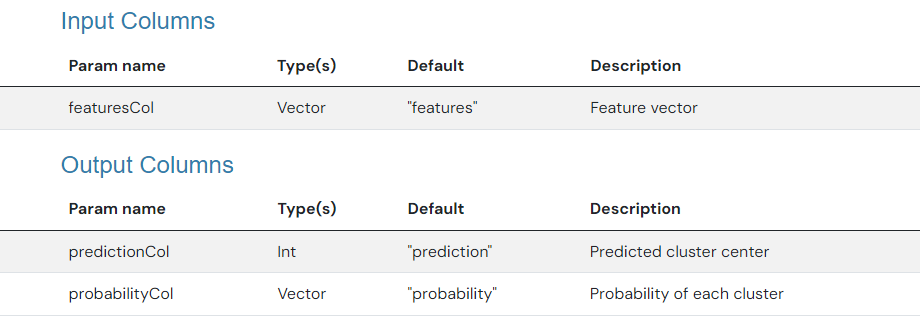

In [29]:
from pyspark.ml.clustering import GaussianMixture

gmm   = GaussianMixture().setK(2).setSeed(538009335).fit(df_cluster)
model = gmm

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                                                              

#####   

#####  
# Power Iteration Clustering (PIC):
 - It is a **scalable graph** clustering algorithm developed by Lin and Cohen. 
 - PIC finds a very low-dimensional embedding of a dataset using truncated power iteration on a normalized pair-wise similarity matrix of the data.

**spark.ml**’s **PowerIterationClustering** implementation takes the following parameters:

 - **k:** the number of clusters to create
 - **initMode:** param for the initialization algorithm
 - **maxIter:** param for maximum number of iterations
 - **srcCol:** param for the name of the input column for source vertex IDs
 - **dstCol:** name of the input column for destination vertex IDs
 - **weightCol:** Param for weight column name

In [2]:
from pyspark.ml.clustering import PowerIterationClustering

df = spark.createDataFrame([
    (0, 1, 1.0),
    (0, 2, 1.0),
    (1, 2, 1.0),
    (3, 4, 1.0),
    (4, 0, 0.1)
], ["src", "dst", "weight"])

pic = PowerIterationClustering(k=2, maxIter=20, initMode="degree", weightCol="weight")

# Shows the cluster assignment
pic.assignClusters(df).show()

Py4JJavaError: An error occurred while calling o48.assignClusters.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (DESKTOP-MMJOJFK executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1170)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1089)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.$anonfun$getOrCompute$1(RDD.scala:378)
	at org.apache.spark.storage.BlockManager.$anonfun$getOrElseUpdate$1(BlockManager.scala:1372)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1601)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1528)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1592)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1389)
	at org.apache.spark.storage.BlockManager.getOrElseUpdateRDDBlock(BlockManager.scala:1343)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:376)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:326)
	at org.apache.spark.graphx.EdgeRDD.compute(EdgeRDD.scala:50)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessImpl.create(Native Method)
	at java.base/java.lang.ProcessImpl.<init>(ProcessImpl.java:500)
	at java.base/java.lang.ProcessImpl.start(ProcessImpl.java:159)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1126)
	... 67 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$foreachPartition$1(RDD.scala:1036)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.foreachPartition(RDD.scala:1034)
	at org.apache.spark.mllib.clustering.PowerIterationClustering$.materialize(PowerIterationClustering.scala:448)
	at org.apache.spark.mllib.clustering.PowerIterationClustering$.normalize(PowerIterationClustering.scala:307)
	at org.apache.spark.mllib.clustering.PowerIterationClustering.run(PowerIterationClustering.scala:205)
	at org.apache.spark.ml.clustering.PowerIterationClustering.assignClusters(PowerIterationClustering.scala:179)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1170)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1089)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.$anonfun$getOrCompute$1(RDD.scala:378)
	at org.apache.spark.storage.BlockManager.$anonfun$getOrElseUpdate$1(BlockManager.scala:1372)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1601)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1528)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1592)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1389)
	at org.apache.spark.storage.BlockManager.getOrElseUpdateRDDBlock(BlockManager.scala:1343)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:376)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:326)
	at org.apache.spark.graphx.EdgeRDD.compute(EdgeRDD.scala:50)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessImpl.create(Native Method)
	at java.base/java.lang.ProcessImpl.<init>(ProcessImpl.java:500)
	at java.base/java.lang.ProcessImpl.start(ProcessImpl.java:159)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1126)
	... 67 more


#####   

# NLP

# Initializing SparkSession

In [181]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.sql import SparkSession

spark = SparkSession\
.builder\
.appName("Python Spark SQL basic example")\
.config("spark.some.config.option","some-value")\
.getOrCreate()

spark

# Reading Data

In [182]:
df = spark.read.format("csv").load("NLP_01.csv", header=True, inferSchema=True)

In [183]:
df.show()

+-----+--------------------+
|label|            sentence|
+-----+--------------------+
|    0|Hi I heard about ...|
|    0|I wish Java could...|
|    0|Logistic Regressi...|
+-----+--------------------+



# Tokenizer

In [184]:
tokenizer = Tokenizer(inputCol='sentence',outputCol='words')

In [185]:
wordsData = tokenizer.transform(df)
wordsData.show()

+-----+--------------------+--------------------+
|label|            sentence|               words|
+-----+--------------------+--------------------+
|    0|Hi I heard about ...|[hi, i, heard, ab...|
|    0|I wish Java could...|[i, wish, java, c...|
|    0|Logistic Regressi...|[logistic, regres...|
+-----+--------------------+--------------------+



In [186]:
wordsData.select('label','words').take(3)

[Row(label=0, words=['hi', 'i', 'heard', 'about', 'spark']),
 Row(label=0, words=['i', 'wish', 'java', 'could', 'use', 'case', 'classes']),
 Row(label=0, words=['logistic', 'regression', 'models', 'are', 'neat'])]

# HashingTF

In [187]:
hashingTF = HashingTF(inputCol='words',outputCol='rawFeatures',numFeatures=1000)

In [188]:
featurizedData = hashingTF.transform(wordsData)
featurizedData.show()

+-----+--------------------+--------------------+--------------------+
|label|            sentence|               words|         rawFeatures|
+-----+--------------------+--------------------+--------------------+
|    0|Hi I heard about ...|[hi, i, heard, ab...|(1000,[286,568,67...|
|    0|I wish Java could...|[i, wish, java, c...|(1000,[80,133,307...|
|    0|Logistic Regressi...|[logistic, regres...|(1000,[59,286,604...|
+-----+--------------------+--------------------+--------------------+



In [189]:
featurizedData.select('label','rawFeatures').take(3)

[Row(label=0, rawFeatures=SparseVector(1000, {286: 1.0, 568: 1.0, 673: 1.0, 756: 1.0, 956: 1.0})),
 Row(label=0, rawFeatures=SparseVector(1000, {80: 1.0, 133: 1.0, 307: 1.0, 342: 1.0, 495: 1.0, 756: 1.0, 967: 1.0})),
 Row(label=0, rawFeatures=SparseVector(1000, {59: 1.0, 286: 1.0, 604: 1.0, 763: 1.0, 871: 1.0}))]

# IDF

In [190]:
idf = IDF( inputCol='rawFeatures', outputCol='Features' )
idfModel = idf.fit(featurizedData)

In [191]:
rescaledData = idfModel.transform(featurizedData)
rescaledData.select('label','Features').show()

+-----+--------------------+
|label|            Features|
+-----+--------------------+
|    0|(1000,[286,568,67...|
|    0|(1000,[80,133,307...|
|    0|(1000,[59,286,604...|
+-----+--------------------+



In [192]:
rescaledData.select('label','Features').take(3)

[Row(label=0, Features=SparseVector(1000, {286: 0.2877, 568: 0.6931, 673: 0.6931, 756: 0.2877, 956: 0.6931})),
 Row(label=0, Features=SparseVector(1000, {80: 0.6931, 133: 0.6931, 307: 0.6931, 342: 0.6931, 495: 0.6931, 756: 0.2877, 967: 0.6931})),
 Row(label=0, Features=SparseVector(1000, {59: 0.6931, 286: 0.2877, 604: 0.6931, 763: 0.6931, 871: 0.6931}))]

# Stop

In [193]:
spark.stop()

#####   